# Scraping a Children's Bedtime Story Website:
In this project, we will scrape <a href=https://storiestogrowby.org/bedtime-stories-kids-free/> a story </a> website. This website offers 99 bedtime stories for children across five pages. Each story is presented with a thumbnail, title of the story along with a short description. The user can access the story by clicking the thumbnail. We will scrape the story titles along with the short descriptions; clean the text, if necessary, and display them in a neat list format.
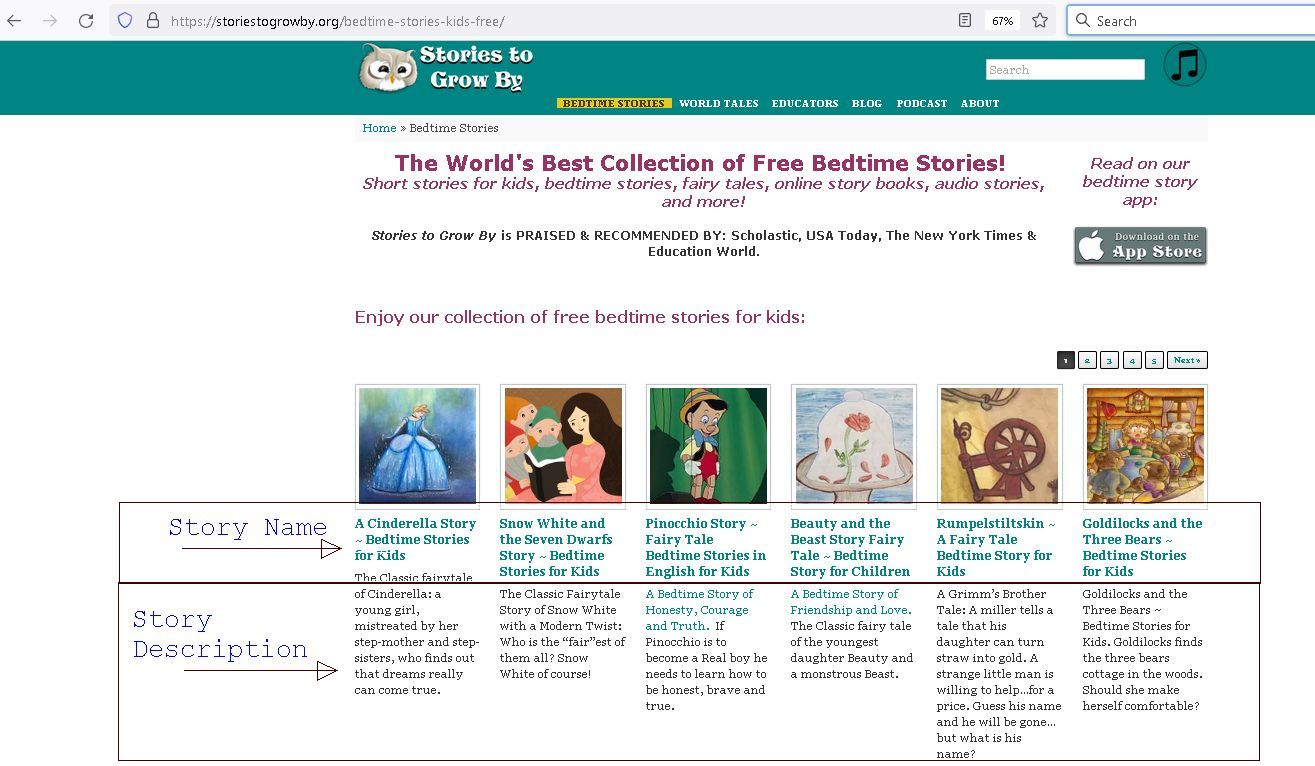

In [1]:
#Import necessary libraries:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

Since stories are displayed across 5 pages, we have to connect to the website 5 times. At each connection, we will add the content to a list called **content_collect**. 

The website's address for the main page is "https://storiestogrowby.org/bedtime-stories-kids-free/". When users browse to the second page, the address becomes "https://storiestogrowby.org/bedtime-stories-kids-free/page/2". The address format is similar for the following pages. So, once we connect to the main page and collect the content, we can start a loop and go through pages two to five and collect content automatically. 

In [2]:
#Create a list that will hold the content of all five pages:
content_collect = []
#Connect to the main page:
response = requests.get("https://storiestogrowby.org/bedtime-stories-kids-free/")
#Store the content of the main page
content = response.content
#Add content to content_collect:
content_collect.append(content)
#Do the same for pages 2 through 5 with a loop
for i in range(2,6):
    #Change the number at the end, to connect to the next page
    response = requests.get("https://storiestogrowby.org/bedtime-stories-kids-free/page/{}".format(i))
    #Get the content of the current page
    content = response.content
    #Add the current content to the list 
    content_collect.append(content)
#Print the size of the content list
print("The size of content_collect is {}.".format(len(content_collect)))

The size of content_collect is 5.


We see that the code above indeed collected the contents of five pages. 

Now, we need to parse the html code. When we inspect the actual html file, we see that the story titles are stored under the class named "entry-title" and story descriptions are stored under the class named "entry-content". We will create a list called **title** to hold the story titles  and another list called **body** to hold the short descriptions of the stories. Once we set up our parser using **Beautiful Soup** library, we will find all cases of "entry-title" and "entry-content" in the html code, and store the story title and short description of the story to the title and body lists respectively.  

In [7]:
#Create a list to hold the names of the stories
title = []
#Create a list to hold the short descriptions of the stories
body =[]
#Go through each of 5 pages and parse the html code:
for i in range(5):
    parser = BeautifulSoup(content_collect[i], 'html.parser')
    #For each page, go through all the stories
    for j in range(len(parser.find_all(class_='entry-title'))):
        #For each story, add the name to the list title
        title.append(parser.find_all(class_='entry-title')[j].text)
        #For each story, add the description to the list body
        body.append(parser.find_all(class_='entry-content')[j].text)
print("First five stories' titles are:\n\n {}.\n".format(title[:5]))
print("First five stories' descriptions are:\n\n {}.".format(body[:5]))

First five stories' titles are:

 ['A Cinderella Story ~ Bedtime Stories for Kids', 'Snow White and the Seven Dwarfs Story ~ Bedtime Stories for Kids', 'Pinocchio Story ~ Fairy Tale Bedtime Stories in English for Kids', 'Beauty and the Beast Story Fairy Tale ~ Bedtime Story for Children', 'Rumpelstiltskin ~ A Fairy Tale Bedtime Story for Kids'].

First five stories' descriptions are:

 ['\nThe Classic fairytale of Cinderella: a young girl, mistreated by her step-mother and step-sisters, who finds out that dreams really can come true.\n', '\nThe Classic Fairytale Story of Snow White with a Modern Twist: Who is the “fair”est of them all? Snow White of course!\n', '\nA Bedtime Story of Honesty, Courage and Truth.\xa0 If Pinocchio is to become a Real boy he needs to learn how to be honest, brave and true.\n', '\nA Bedtime Story of Friendship and Love.\xa0 The Classic fairy tale of the youngest daughter Beauty and a monstrous Beast.\n', '\nA Grimm’s Brother Tale: A miller tells a tale that 

We see that the data we collected need some cleaning. 

We need only the titles of the stories but we see the titles of the stories are followed by a ~ sign and some redundant information. We will create a new list called **title_new** that will hold only the titles of the stories.  

In the description part, we see many '\n's and '\xa0's that we have to get rid of to obtain a coherent story description. We will employ **re** library and write a regex to remove these from the text. Then we will add these descriptions of the stories to a new list called **body_new**.  

In [8]:
#Create a list that will hold cleaned description 
body_new = []
#Create a list that will hold cleaned title
title_new = []
#Regex to get rid of uncoherent text
pattern=r"[\n\\']|\xa0"
#Go through all stories:
for k in range(len(body)):
    #Delete all '\n's and '\xa0's in the descriptions of the stories 
    body_new.append(re.sub(pattern, '', body[k]))
    #Store only the names of the stories, get rid of the second part
    title_new.append(title[k].split('~')[0])
print("First five stories' titles are:\n\n {}.\n".format(title_new[:5]))
print("First five stories' descriptions are:\n\n {}.".format(body_new[:5]))

First five stories' titles are:

 ['A Cinderella Story ', 'Snow White and the Seven Dwarfs Story ', 'Pinocchio Story ', 'Beauty and the Beast Story Fairy Tale ', 'Rumpelstiltskin '].

First five stories' descriptions are:

 ['The Classic fairytale of Cinderella: a young girl, mistreated by her step-mother and step-sisters, who finds out that dreams really can come true.', 'The Classic Fairytale Story of Snow White with a Modern Twist: Who is the “fair”est of them all? Snow White of course!', 'A Bedtime Story of Honesty, Courage and Truth. If Pinocchio is to become a Real boy he needs to learn how to be honest, brave and true.', 'A Bedtime Story of Friendship and Love. The Classic fairy tale of the youngest daughter Beauty and a monstrous Beast.', 'A Grimm’s Brother Tale: A miller tells a tale that his daughter can turn straw into gold. A strange little man is willing to help…for a price. Guess his name and he will be gone…but what is his name?'].


Now that we cleaned the data, we will display it in a presentable format. 

We will create a dictionary to hold the data then use **pandas** library's DataFrame() function to lay out the data in a visually appealing way. 

In [9]:
#Create a dictionary to hold 
#the titles and descriptions of the stories 
store_name_descr = {}
store_name_descr['Story Name'] = title_new 
store_name_descr['Short Description'] = body_new

In [6]:
#Create a DataFrame by using the dictionary
story_dataframe = pd.DataFrame(data=store_name_descr,  columns=['Story Name', 'Short Description'])
#Set the DataFrame so all text is left-aligned and index is hidden
pretty_story = story_dataframe.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
pretty_story.set_properties(**{'text-align': 'left'}).hide_index()
pretty_story


Story Name,Short Description
A Cinderella Story,"The Classic fairytale of Cinderella: a young girl, mistreated by her step-mother and step-sisters, who finds out that dreams really can come true."
Snow White and the Seven Dwarfs Story,The Classic Fairytale Story of Snow White with a Modern Twist: Who is the “fair”est of them all? Snow White of course!
Pinocchio Story,"A Bedtime Story of Honesty, Courage and Truth. If Pinocchio is to become a Real boy he needs to learn how to be honest, brave and true."
Beauty and the Beast Story Fairy Tale,A Bedtime Story of Friendship and Love. The Classic fairy tale of the youngest daughter Beauty and a monstrous Beast.
Rumpelstiltskin,A Grimm’s Brother Tale: A miller tells a tale that his daughter can turn straw into gold. A strange little man is willing to help…for a price. Guess his name and he will be gone…but what is his name?
Goldilocks and the Three Bears,Goldilocks and the Three Bears ~ Bedtime Stories for Kids. Goldilocks finds the three bears cottage in the woods. Should she make herself comfortable?
Hansel and Gretel,"Hansel and Gretel Bedtime Stories for Kids. When Hansel and Gretel go in search of food, they find a gingerbread house. But who is inside?"
Rapunzel by the Brothers Grimm,"A Story of Friendship, Love and Courage. Rapunzel’s Story ~ A Brothers Grimm Fairy Tale. An evil witch has trapped Rapunzel in a tower. Can her long hair or love save her?"
The Sword in the Stone: a King Arthur Legend of the Sword Story,"A Story of Courage, Justice and Self-Awareness. Merlin the Magician places a magic sword in a stone…whomever can pull it out is the rightful king."
The Ugly Duckling Story,A Bedtime Story of Acceptance and Self-Awareness. A Mama Duck is proud when her six ducklings hatch from their eggs. But one duckling does not look like the others? Is he truly an Ugly Duckling?


Pandas' DataFrame() is an incredibly dynamic and useful tool to hold data. We can sort, retrieve, delete or filter data very easily by using dataframes as they are an integral part of the Python and Numpy ecosystems. 

In this project, we scraped a website, captured the necessary parts of the data, cleaned and presented it in a user friendly way.  